<a href="https://colab.research.google.com/github/Sheeeeethal/Credit_card_fraud_project1/blob/main/Credit_card_CLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing kaggle
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sheethalkamada","key":"6efb35cedaf3e2291027491fe75fb1fb"}'}

In [ ]:
#Creating a directory for kaggle
! mkdir ~/.kaggle

In [ ]:
#Copy the json file here
! cp kaggle.json ~/.kaggle/

In [ ]:
#Granting the essential permissions for us to access the files
#using chmod
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Listing out all the datasets in kaggle out here
! kaggle datasets list

ref                                                    title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                 Netflix Movies and TV Shows                      1MB  2024-04-10 09:48:38           2067         43  1.0              
sudarshan24byte/online-food-dataset                    Online Food Dataset                              3KB  2024-03-02 18:50:30          28804        557  0.9411765        
arnavsmayan/amazon-prime-userbase-dataset              Amazon Prime Userbase Dataset                  104KB  2024-04-15 06:25:10            793         25  1.0              
akankshaaa013/top-grossing-movies-dataset              Top Grossing Movies Dataset                     33KB  2024-04-08 08:29:47  

In [ ]:
#Our credit card datset from kaggle
!kaggle datasets download 'mlg-ulb/creditcardfraud' -f 'creditcard.csv'

 83% 55.0M/66.0M [00:00<00:00, 85.2MB/s]
100% 66.0M/66.0M [00:00<00:00, 76.4MB/s]


In [ ]:
#unzipping the files that we've imported
!unzip creditcard.csv.zip

Archive:  creditcard.csv.zip
  inflating: creditcard.csv          


## We'll be doing the following in sequence
1. Importing the dependencies
2. Exploratory Data Analysis
3. Splitting the data into train and test sets
4. Model building
        - Performing cross-validation with RepeatedKfold
        - Performing cross-validation with StratifiedKfold
        - RandomOverSampler with StratifiedKfoldClassifier
        - oversampling with SMOTE
        - oversampling with ADASYN
5. Hyperparameter tuning

## Importing our dependencies


In [ ]:
#importing the necessary libraries
#First the basis libraries
import pandas as pd
import numpy as np
import time

#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing sklearn and preprocessing
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Importing various metrics from sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

#Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Importing various classification related models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing xGboost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

#Importing scipy and stats
import scipy
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

#To avoid any sort of warnings
import warnings
warnings.filterwarnings("ignore")


## Importing our dataset

In [ ]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Checking the shape of the dataset
df.shape

(284807, 31)

In [ ]:
#Our target vraible is 'Class' here, it has 2 values
#1 for fraudulent data
#0 for normal data
df.Class.value_counts()

#It's obvious that the dataset is imbalanced as there are more legit transactions than fraudulent ones


Class
0    284315
1       492
Name: count, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

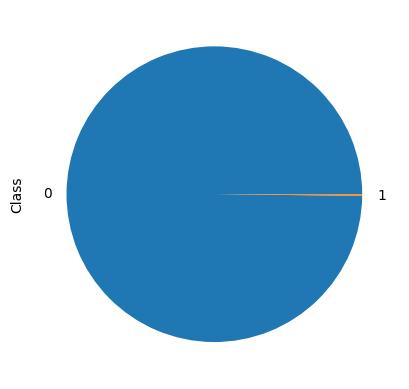

In [ ]:
#Checking the data distribution in our target variable and checking it in the percentage form
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)

#Visualization of the dsitribution in the pie chart
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

In [ ]:
#Checking the % distribution in the normal v/s fraud
classes = df.Class.value_counts()
normal_share = classes[0]/df['Class'].count()*100
fraud_share = classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


In [ ]:
#Checking the correlation between them
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


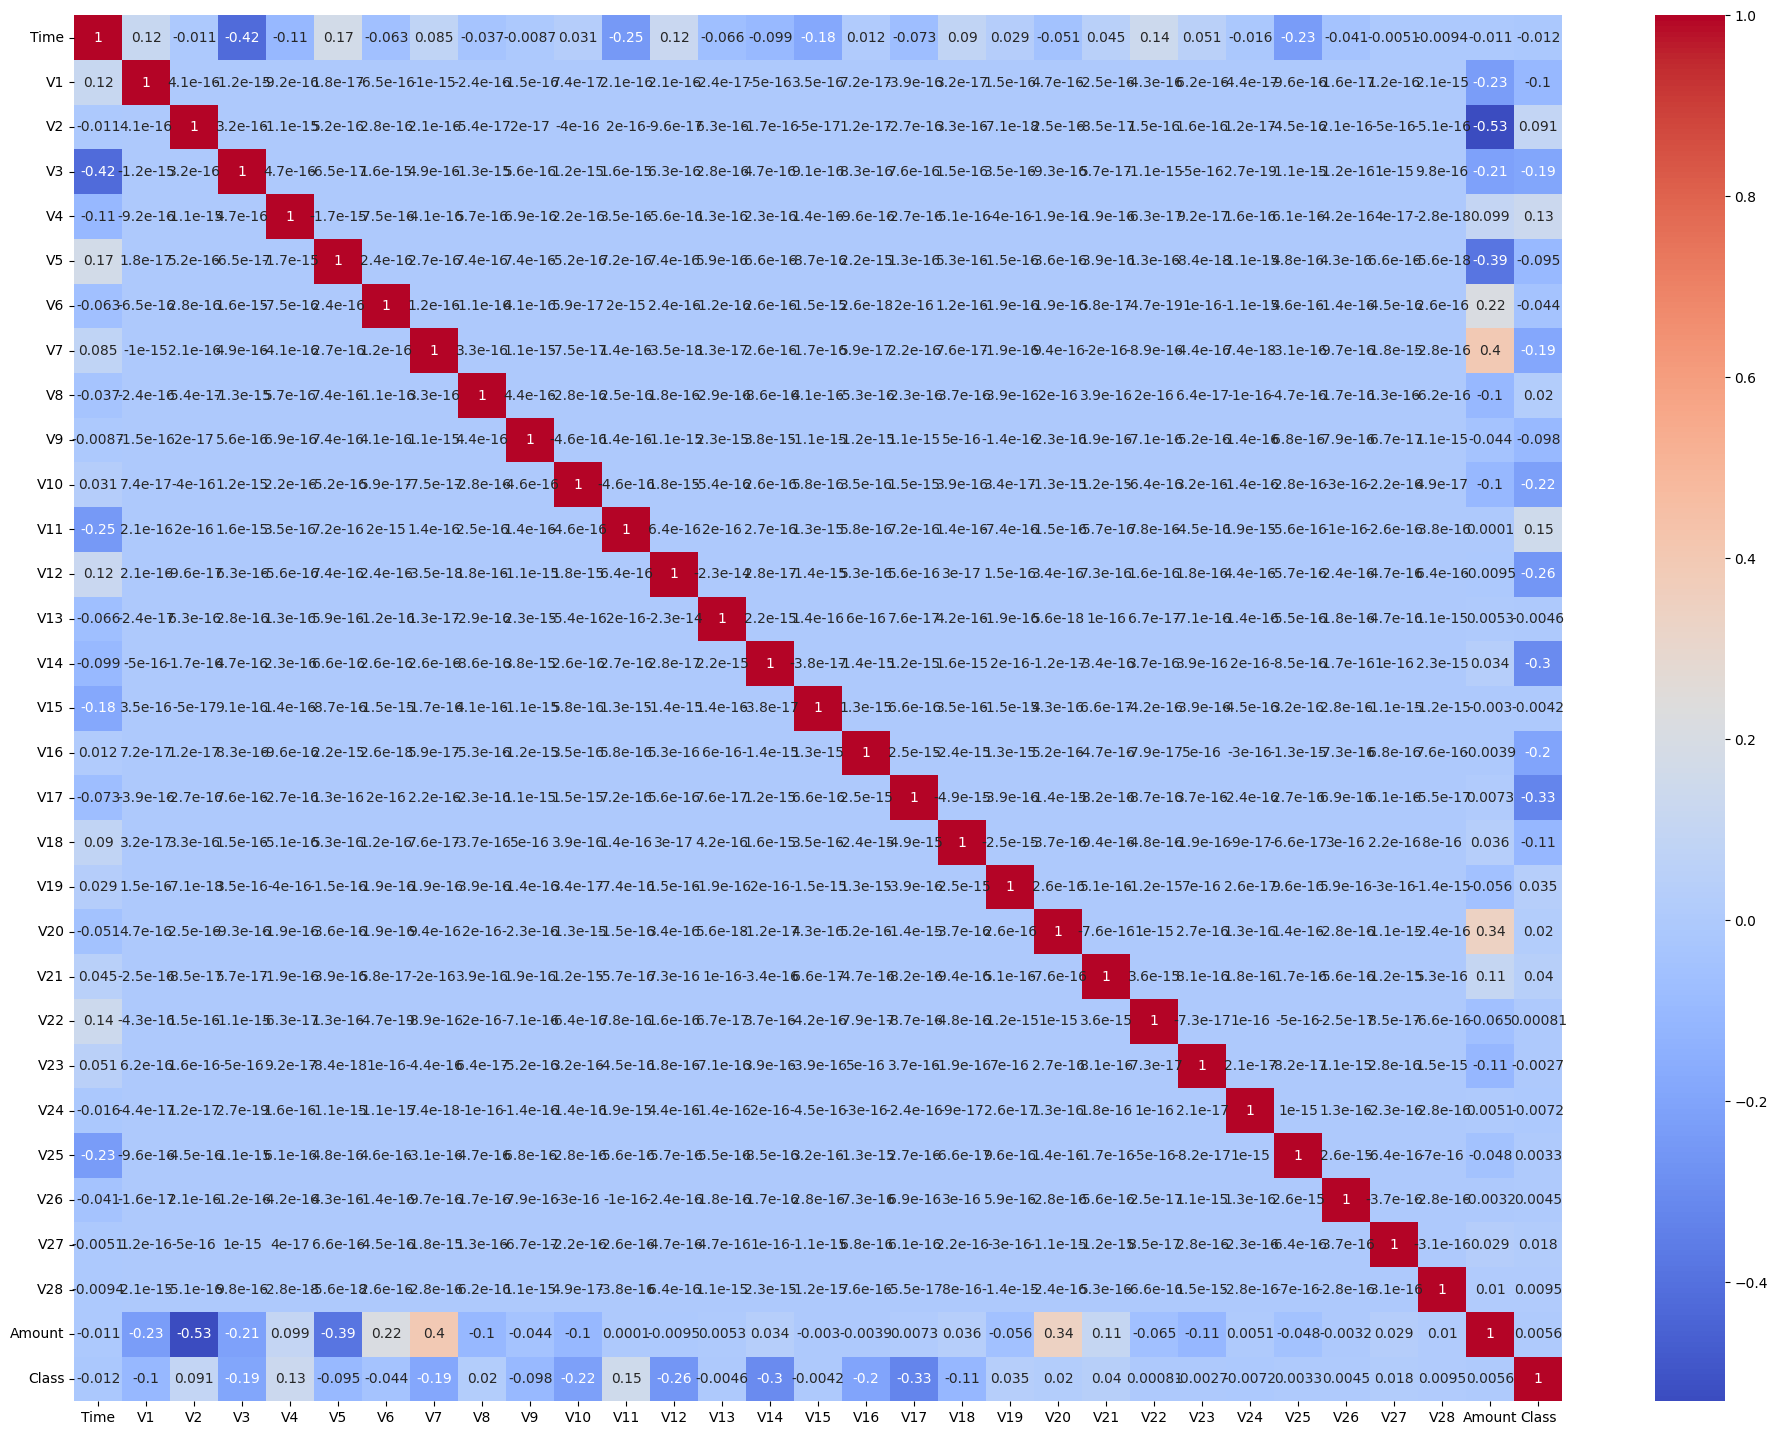

In [ ]:
#Checking the correlation with the help of a heatmap
plt.figure(figsize = (24,18))

sns.heatmap(corr, cmap = "coolwarm", annot = True)
plt.show()

#Here the dark blur shows the highly correlated and the light blue shows the weakly correlated

In [ ]:
#Perofrming some feature engineering
#As the time is given in relative fashion, we are using pandas.Timedelta which represnts duration
Delta_time = pd.to_timedelta(df['Time'], unit = 's')

#Creating derived columns mins and hours
df['Time_Day'] = (Delta_time.dt.components.days).astype(int)
df["TIme_hour"] = (Delta_time.dt.components.hours).astype(int)
df["Time_min"] = (Delta_time.dt.components.minutes).astype(int)

In [ ]:
#Drop the unnecessary columns
#We will drop time, as we've derived the day/hour/mins from the time column
df.drop('Time', axis = 1, inplace = True)

#We'll keep only the derived column hour as the day/minutes might not be really useful
df.drop(['Time_Day', 'Time_min'], axis = 1, inplace = True)

## Splitting the data into train and test data

In [ ]:
#Splitting the dataset into features and target variables
X = df.drop(['Class'], axis = 1)
y = df['Class']

In [ ]:
#Displaying the rows of X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,TIme_hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Displaying the rows of y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
#Splitting the dataset using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size = 0.20)

## Preserve X_test and y_test to evaluate on the test data once you build the model

In [ ]:
#Checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [ ]:
#Accumulating all the columns names under one variable
cols = list(X.columns.values)

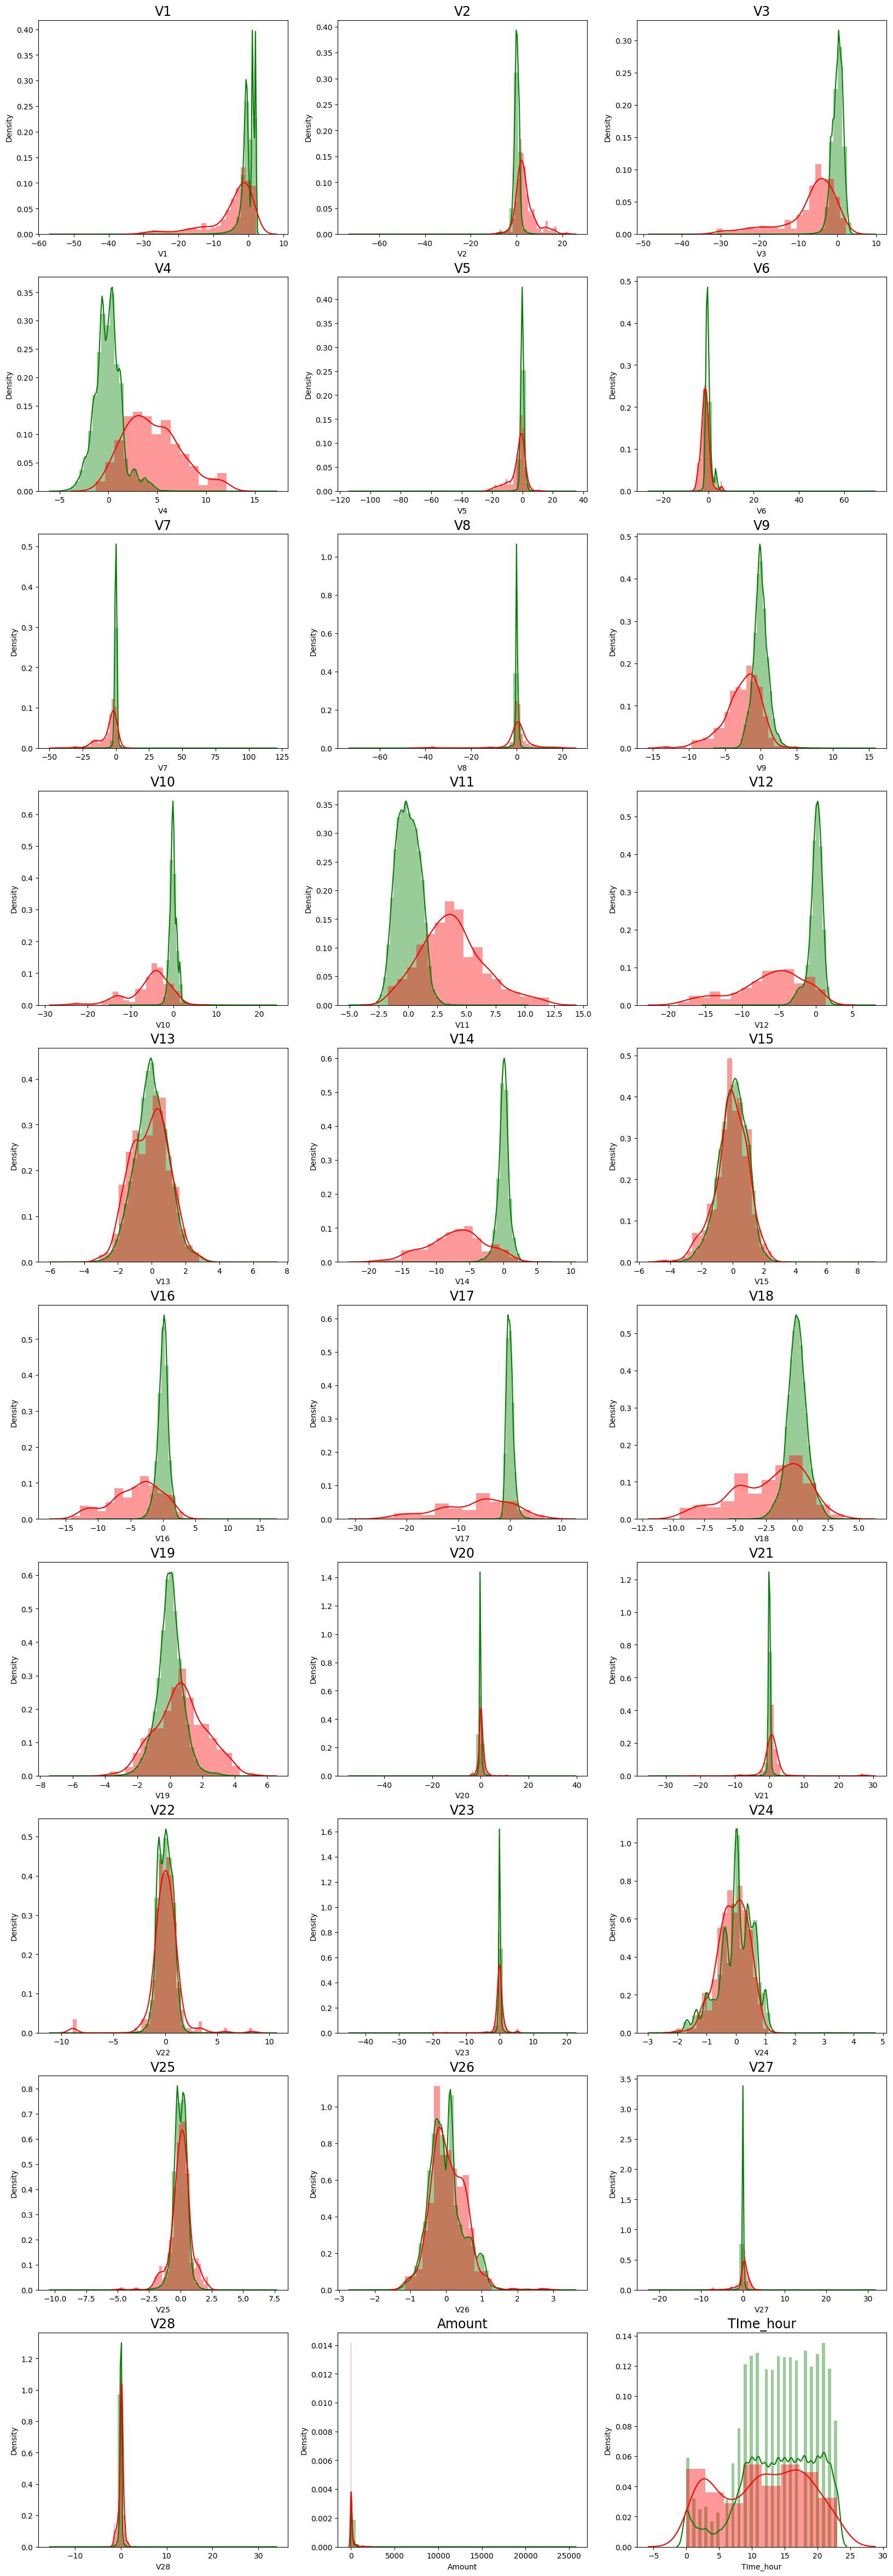

In [ ]:
#plot the histogram of a variable from the dataset to see the skewness
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize = (20, 60))
for n, col in enumerate(cols):
  plt.subplot(10, 3, n+1)
  sns.distplot(X[col][normal_records], color = 'green')
  sns.distplot(X[col][fraud_records], color = 'red')
  plt.title(col, fontsize = 17)
plt.show()

## Model building

In [ ]:
#Creating a common fucntion to plot confusion matrix
#Common fucntion helps us make a confusion matrix for all our differen models

def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Accent)
  categoryNames = ['Non-fraudulent', 'Fraudulent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation = 45)
  plt.yticks(ticks, categoryNames)
  s = ['TN', 'FP'], ['FN', 'TP']

  for i in range(2):
    for j in range(2):
      plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]), fontsize = 12)
  plt.show()

In [ ]:
#Creating  a common fucntion to fit on a logistic Regression model for both L1 and L2
def BuildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

    # Logistic Regression
    from sklearn import linear_model
    from sklearn.model_selection import KFold
    from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10
    )

    searchCV_l1 = linear_model.LogisticRegression(
        Cs=num_C,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )

    searchCV_l1.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)
    print('Max auc_roc for l1: ', searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l2: ', searchCV_l2.scores_[1].mean(axis=0).max())

    print("Parameters for l1 regularisations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)

    print("Parameters for l2 regularisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)

    # Finding the predicted Values
    y_pred_l1 = searchCV_l1.predict(X_test)
    y_pred_l2 = searchCV_l2.predict(X_test)

    # Finding the predicted probabilities
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:, 1]
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:, 1]

    # Accuracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    print("Accuracy of logistics model with l2 regularisation: {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred_l2))
    print("classification Report")
    print(classification_report(y_test, y_pred_l2))

    print("Accuracy of logistics model with l1 regularisation: {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred_l1))
    print("classification Report")
    print(classification_report(y_test, y_pred_l1))

    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = auc(fpr, tpr)
    print("Roc for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="test, auc" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()


    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc_value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = auc(fpr, tpr)
    print("Roc for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="test, auc" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()



In [ ]:
#Creating a common function to fit and predict on a KNN model

def BuildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

  #Create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors =5, n_jobs = 16)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  print("model score")
  print(score)

  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred = y_pred, y_true = y_test)
  print("Confusion Matrix ")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))

  knn_probs = knn.predict_proba(X_test)[:, 1]

  #Calcualting the roc auc curve
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc value: {0}".format(knn_roc_value))
  fpr,tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
  plt.plot(fpr, tpr, label = "test, auc="+str(roc_auc))
  plt.legend(loc = 4)
  plt.show()


In [ ]:
#Creating a common function to fit and predict on Tree models for both gini and entropy creteria
def BuildAndRunTreeModels(af_Results, Methodology, X_train, y_train, X_test, y_test):

  #Evaluate decision tree model with 'gini' and 'entropy'
  criteria = ['gini', 'entropy']
  scores = {}

  for c in criteria:
    dt = DecisionTreeClassifier(criterion = c, random_state = 42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    test_score = dt.score(X_test, y_test)
    tree_preds = dt.predict_proba(X_test)[:, 1]
    tree_roc_value = roc_auc_score(y_test, tree_preds)
    scores = test_score

    print(c + "score: {0}".format(test_score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification report")
    print(classification_report(y_test, y_pred))

    print(c + "tree_roc_value: {0}".format(tree_roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Tree threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label = "Test, auc ="+str(roc_auc))
    plt.legend(loc = 4)
    plt.show()



In [ ]:
#Creating a common function to fit and predict on random forest model

def BuildAndRunRandomFOrestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

  #creating the model with around 100 trees
  RF_model = RandomForestClassifier(n_estimators = 100, bootstrap=True, max_features = 'sqrt', random_state = 42)

  #Fit the training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))

  #Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print('classification report')
  print(classification_report(y_test, rf_predictions))

  #Probabilites for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  #Calculating the roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random FOrest roc_value : {0}".format(roc_curve))

  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
  plt.plot(fpr, tpr, label = "Test, auc ="+str(roc_auc))
  plt.legend(loc = 4)
  plt.show()



In [ ]:
#Creating a common function to fit an predict on a XGBoost model
def BuildAndRunXGBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

  #Evaluating XGBoost model
  XGBmodel = XGBClassifier(random_state = 42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print('classification report')
  print(classification_report(y_test, y_pred))

  #Probabilites for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  #Calculating the roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGBoost roc_value: {0}".format(XGB_roc_value))

  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
  plt.plot(fpr, tpr, label = "Test, auc ="+str(roc_auc))
  plt.legend(loc = 4)
  plt.show()





In [ ]:
#creating a common function to fit and predict on a SVM model
def BuildAndRunSVMModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

  #evaluate the svm model with sigmoid kernal model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel = 'sigmoid', random_state = 42)
  clf.fit(X_train, y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_score = accuracy_score(y_test, y_pred_SVM)
  print('Model accuracy: {0}'.format(SVM_score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print('classification report')
  print(classification_report(y_test, y_pred_SVM))

  #Run classifier
  classifier = SVC(kernel = 'sigmoid', probability = True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  #calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  print("SVM roc_value: {0}".format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
  plt.plot(fpr, tpr, label = "Test, auc ="+str(roc_auc))
  plt.legend(loc = 4)
  plt.show()




## Performing Cross Validation with RepeatedKFold

In [ ]:
#Performing repeatedKfold and checking the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state=None)

# X is the feature set and ofc y is the target variable
for train_index, test_index in rkf.split(X,y):
  print('TRAIN: ', train_index, "TEST: ", test_index)
  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST:  [     3      5      6 ... 284798 284802 284803]
TRAIN:  [     0      1      3 ... 284803 284804 284805] TEST:  [     2     10     12 ... 284797 284800 284806]
TRAIN:  [     0      1      2 ... 284803 284804 284806] TEST:  [     4      8     14 ... 284796 284801 284805]
TRAIN:  [     0      1      2 ... 284803 284805 284806] TEST:  [     7     20     30 ... 284791 284799 284804]
TRAIN:  [     2      3      4 ... 284804 284805 284806] TEST:  [     0      1     23 ... 284766 284782 284785]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST:  [    14     27     31 ... 284780 284787 284797]
TRAIN:  [     2      5      6 ... 284804 284805 284806] TEST:  [     0      1      3 ... 284781 284791 284799]
TRAIN:  [     0      1      3 ... 284802 284803 284806] TEST:  [     2      6     10 ... 284800 284804 284805]
TRAIN:  [     0      1      2 ... 284803 284804 284805] TEST:  [     8     15     19 ... 284793 284795 284806]
T

## Feeding the data to our models(the functions we've created for each)

In [ ]:
df_Results = pd.DataFrame(columns = ['Methodology', 'Model','Accuracy', 'roc-value', 'Threshold'])

KNN Model
model score
0.999280209265989
Confusion Matrix 


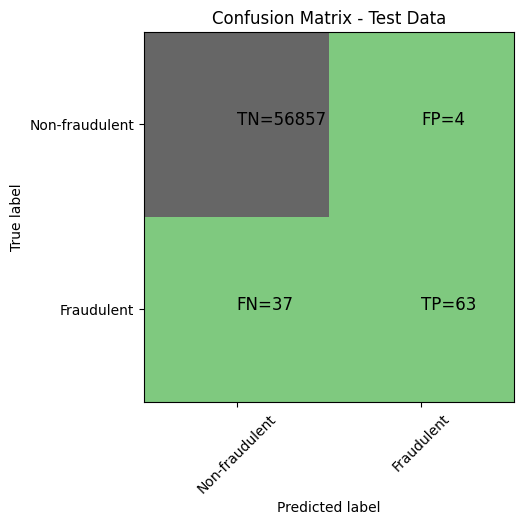

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.94      0.63      0.75       100

    accuracy                           1.00     56961
   macro avg       0.97      0.81      0.88     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc value: 0.9197986317511123
KNN threshold: 0.2
ROC for the test dataset 92.0%


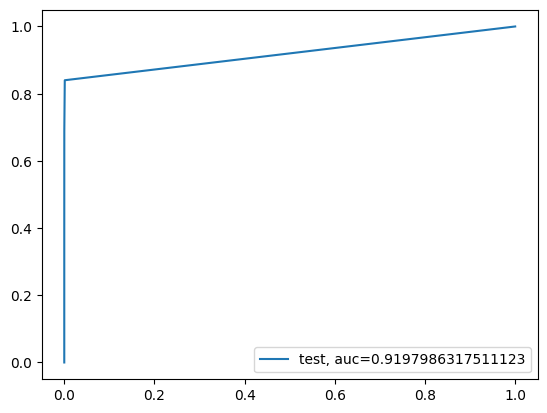

Time taken by model: --- 245.79926300048828 seconds ---
------------------------------------------------------------


In [ ]:
#Running KNN model
print("KNN Model")
start_time = time.time()
df_Results = BuildAndRunKNNModels( df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv )
print("Time taken by model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)


Decision Tree Model with 'Gini' and 'Entropy' criteria
giniscore: 0.999420656238479
Confusion Matrix


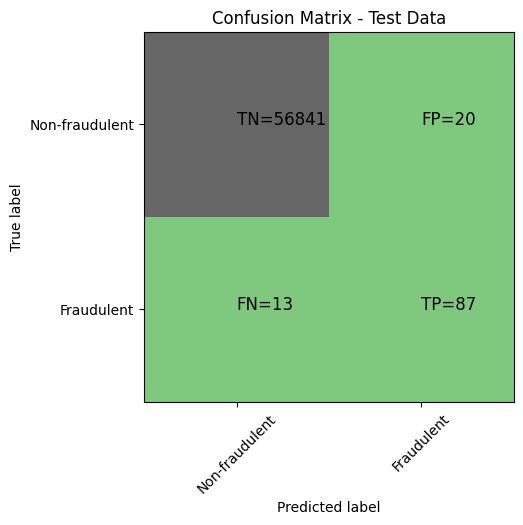

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.81      0.87      0.84       100

    accuracy                           1.00     56961
   macro avg       0.91      0.93      0.92     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.9348241325337227
Tree threshold: 1.0
ROC for the test dataset 93.5%


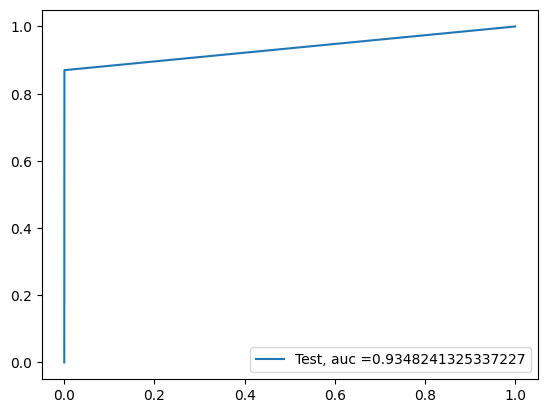

entropyscore: 0.9993855444953564
Confusion Matrix


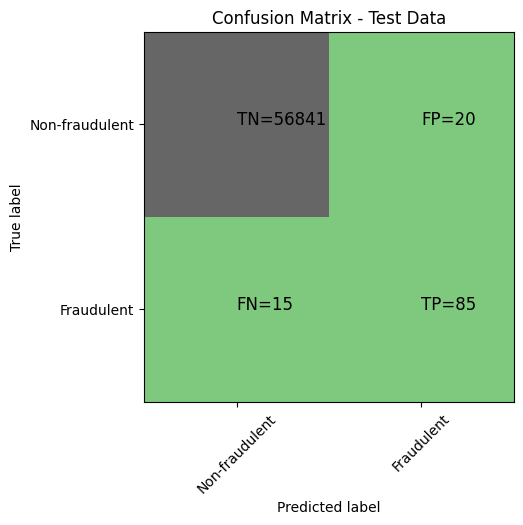

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.81      0.85      0.83       100

    accuracy                           1.00     56961
   macro avg       0.90      0.92      0.91     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.9248241325337226
Tree threshold: 1.0
ROC for the test dataset 92.5%


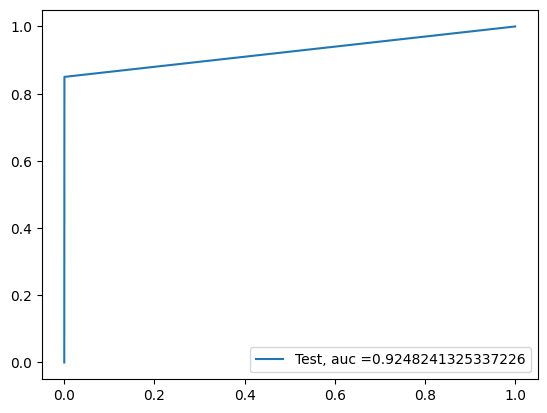

Time taken by model: --- 48.00336027145386 seconds ---
------------------------------------------------------------


In [ ]:
#Running Decision Tree Models with 'gini' and 'entropy' criteria
print("Decision Tree Model with 'Gini' and 'Entropy' criteria")
start_time = time.time()
df_Results = BuildAndRunTreeModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv )
print("Time taken by model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)


Random Forest model
Model Accuracy: 0.9996664384403364
Confusion Matrix


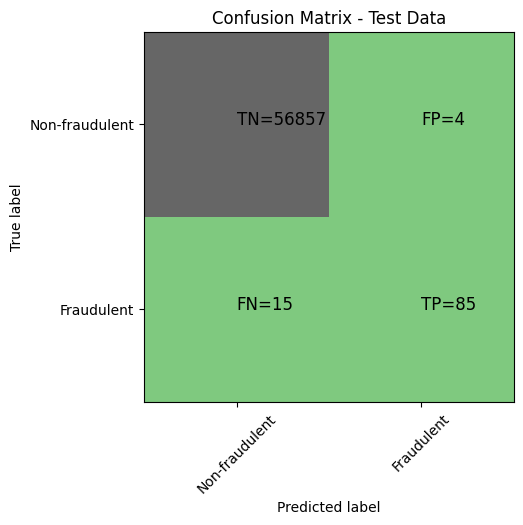

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.96      0.85      0.90       100

    accuracy                           1.00     56961
   macro avg       0.98      0.92      0.95     56961
weighted avg       1.00      1.00      1.00     56961

Random FOrest roc_value : <function roc_curve at 0x782a1917fc70>
Random Forest threshold: 0.02
ROC for the test dataset 97.9%


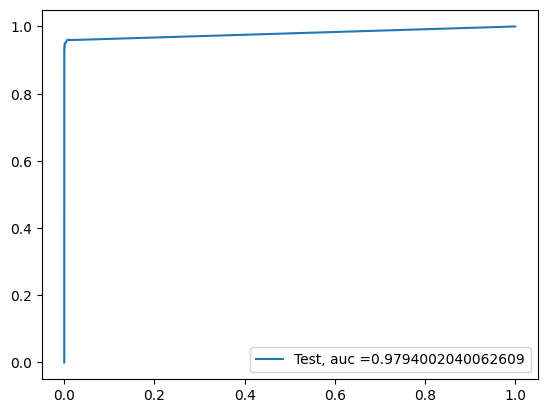

Time taken by model: --- 314.094655752182 seconds ---
------------------------------------------------------------


In [ ]:
#Running Random Forest model
print("Random Forest model")
start_time = time.time()
df_Results = BuildAndRunRandomFOrestModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv )
print("Time taken by model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)


XGBoost Model
Model accuracy: 0.9996488825687752
Confusion Matrix


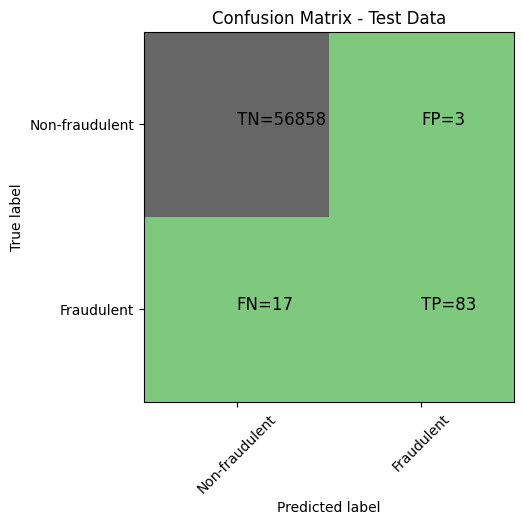

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.97      0.83      0.89       100

    accuracy                           1.00     56961
   macro avg       0.98      0.91      0.95     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9934518386943599
XGBoost threshold: 0.0003174633893650025
ROC for the test dataset 99.3%


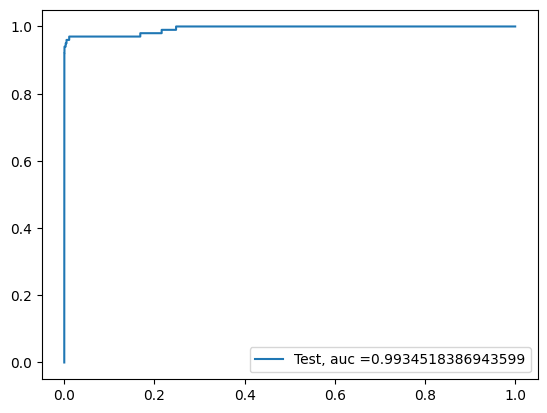

Time taken by model: --- 7.808756351470947 seconds ---
------------------------------------------------------------


In [ ]:
#Running XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = BuildAndRunXGBoostModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv )
print("Time taken by model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)


Running SVM Model with sigmoid kernal
Model accuracy: 0.9983146363301206
Confusion Matrix


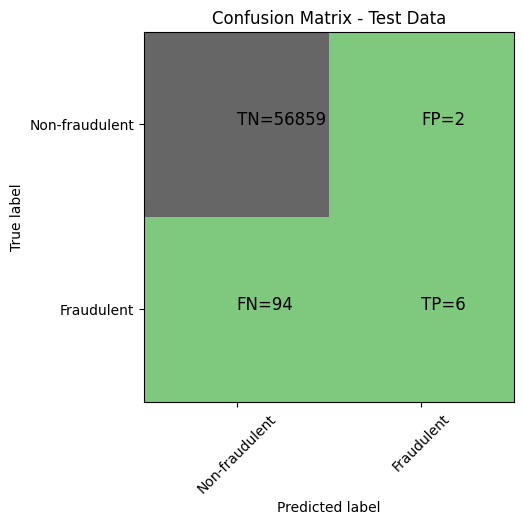

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.75      0.06      0.11       100

    accuracy                           1.00     56961
   macro avg       0.87      0.53      0.56     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.4765656601185347
SVM threshold: 0.002036237793418164
ROC for the test dataset 47.7%


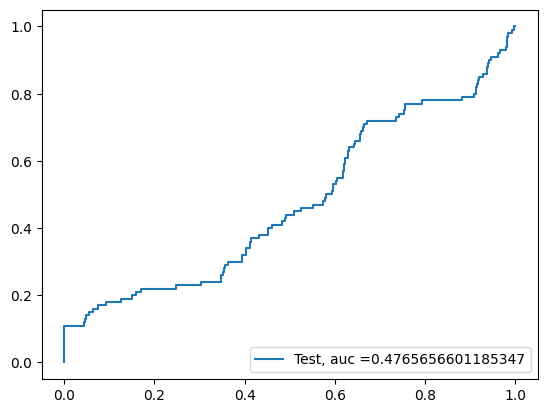

Time taken by model: --- 1427.3077340126038 seconds ---
------------------------------------------------------------


In [ ]:
#Running SVM Model with sigmoid Kernal
print("Running SVM Model with sigmoid kernal")
start_time = time.time()
df_Results = BuildAndRunSVMModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv )
print("Time taken by model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)

## Performing StratifiedKFold and checking the results

In [ ]:
#Performing StratifiedKFold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, random_state = None)

#X is the feature set and y is the target variable
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST: ", test_index)
  X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST:  [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST:  [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST:  [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST:  [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST:  [212516 212644 213092 ... 284804 284805 284806]


KNN Model
model score
0.9991924299081828
Confusion Matrix 


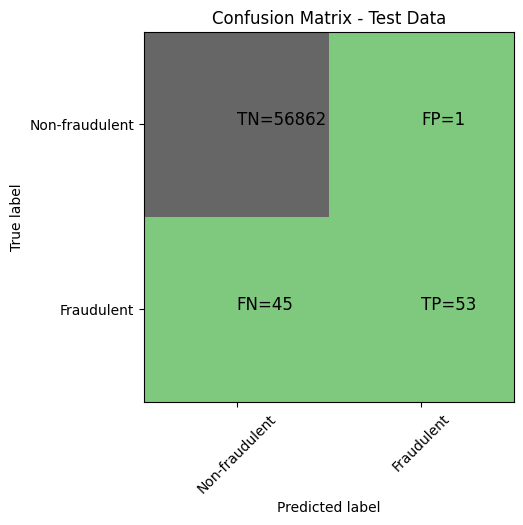

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


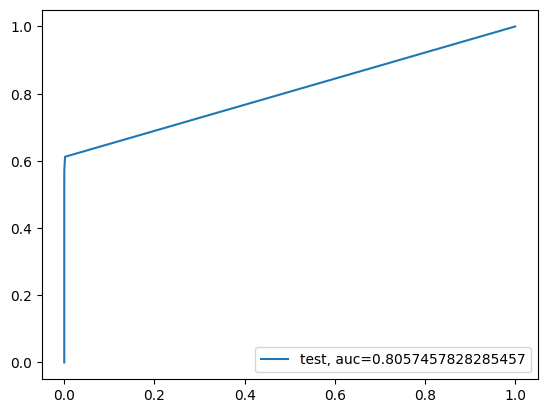

Time taken by model: --- 237.55927276611328 seconds ---
------------------------------------------------------------


In [ ]:
#Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = BuildAndRunKNNModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv )
print("Time taken by model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)


Decision Tree with 'gini' and 'entropy
giniscore: 0.998841312476958
Confusion Matrix


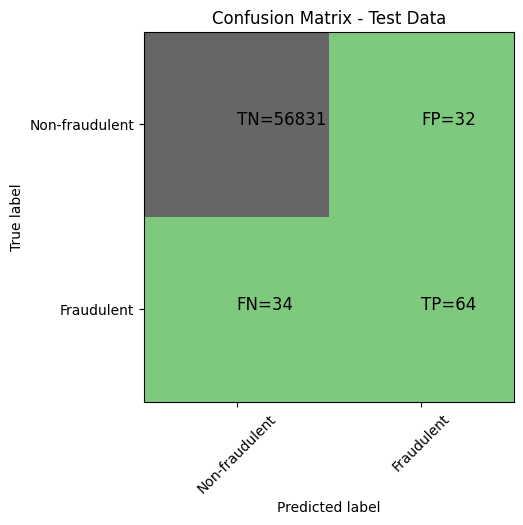

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


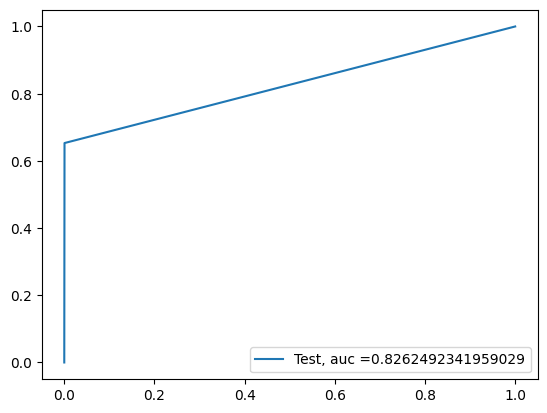

entropyscore: 0.9990168711925703
Confusion Matrix


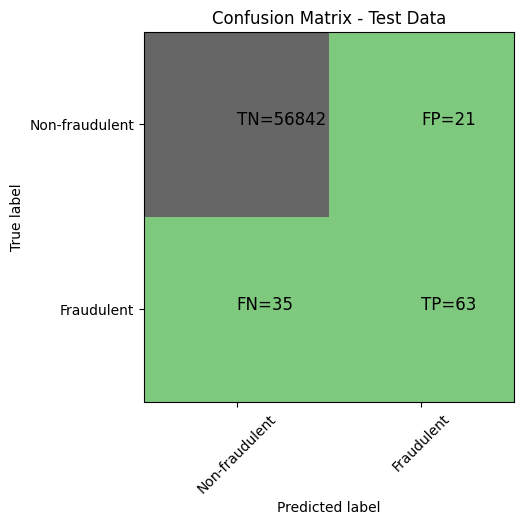

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


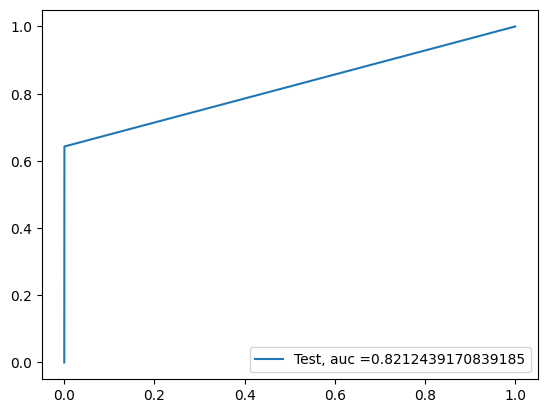

Time taken by model: --- 43.84432816505432 seconds ---
------------------------------------------------------------


In [ ]:
#Running Decision Tree model
print("Decision Tree with 'gini' and 'entropy")
start_time = time.time()
df_Results = BuildAndRunTreeModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv )
print("Time taken by model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)

Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


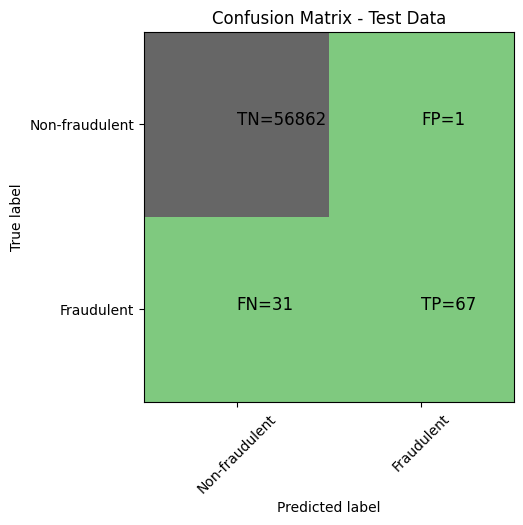

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random FOrest roc_value : <function roc_curve at 0x782a1917fc70>
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


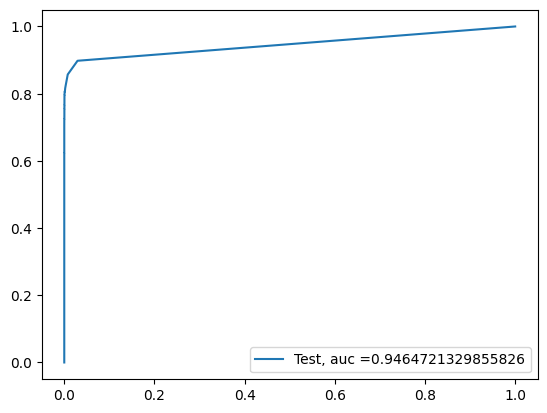

Time taken by model: --- 287.8786292076111 seconds ---
------------------------------------------------------------


In [ ]:
#Running Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = BuildAndRunRandomFOrestModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv )
print("Time taken by model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)

XGBoost Model
Model accuracy: 0.9994382121100402
Confusion Matrix


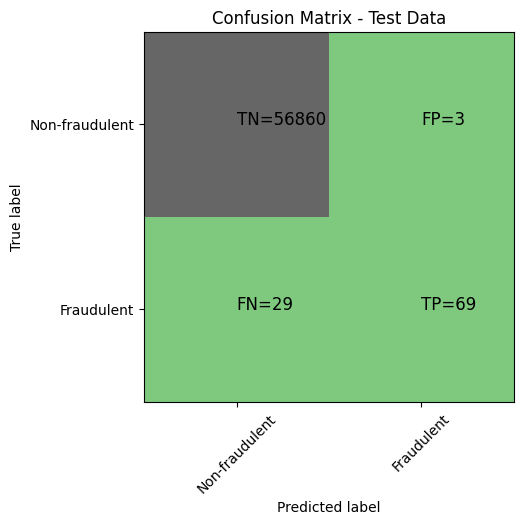

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.70      0.81        98

    accuracy                           1.00     56961
   macro avg       0.98      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9722049451474309
XGBoost threshold: 3.768169699469581e-05
ROC for the test dataset 97.2%


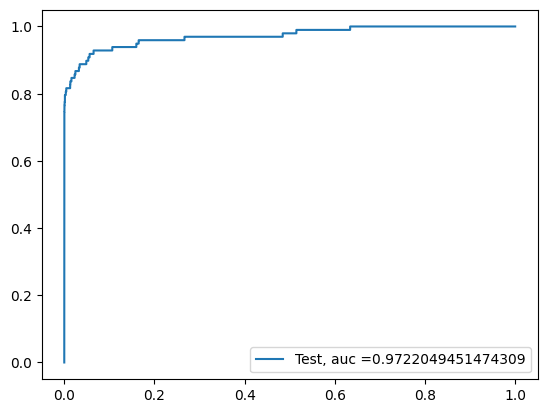

Time taken by model: --- 5.897319555282593 seconds ---
------------------------------------------------------------


In [ ]:
#Running XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = BuildAndRunXGBoostModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv )
print("Time taken by model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)


In [ ]:
# Logistic Regression
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
    Cs=num_C,
    penalty='l2',
    scoring='roc_auc',
    cv=cv_num,
    random_state=42,
    max_iter=10000,
    fit_intercept=True,
    solver='newton-cg',
    tol=10
    )

clf.fit(X_train_SKF_cv, y_train_SKF_cv)
print("Max auc-roc for l2: ", clf.scores_[1].mean(axis = 0).max())

print("Parameters for l2 regularisations")
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)

#Finding the predicted values
y_pred_l2 = clf.predict(X_test)

#Finding the predicted probabilites
y_pred_probs_l2 = clf.predict_proba(X_test)[:,1]

#Accuracy of l2/l1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true = y_test)

print("Accuracy of Logistic model with L2 regularisation: {0}".format(Accuracy_l2))

from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}".format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))


Max auc-roc for l2:  0.9824998302436573
Parameters for l2 regularisations
[[ 0.00683334  0.06145934 -0.06703104  0.21837008  0.05400372 -0.0319603
  -0.02280335 -0.1149601  -0.06954056 -0.16366435  0.12779    -0.19159896
  -0.03711445 -0.36059637  0.00364854 -0.08799108 -0.07288165 -0.0007583
   0.00394511 -0.0279599   0.03822224  0.02337054 -0.01173993 -0.00997821
  -0.00657592  0.00627513 -0.01025023 -0.00174467  0.00039791 -0.00096784]]
[-7.40641365]
{1: array([[0.69243733, 0.69420152, 0.71447107, 0.83768575, 0.95579612,
        0.97136042, 0.98915673, 0.99464431, 0.99129517, 0.99071237,
        0.99096601, 0.99096601, 0.99096601, 0.99096601, 0.99096601,
        0.99096601, 0.99096601, 0.99096601, 0.99096601, 0.99096601],
       [0.60700243, 0.60865586, 0.62914551, 0.76884136, 0.90900227,
        0.94879974, 0.9604112 , 0.98181412, 0.98547001, 0.98328227,
        0.97955152, 0.97955152, 0.97955152, 0.97955152, 0.97955152,
        0.97955152, 0.97955152, 0.97955152, 0.97955152, 0.979

In [ ]:
#Checking for the coefficient values
clf.coef_

array([[ 0.00683334,  0.06145934, -0.06703104,  0.21837008,  0.05400372,
        -0.0319603 , -0.02280335, -0.1149601 , -0.06954056, -0.16366435,
         0.12779   , -0.19159896, -0.03711445, -0.36059637,  0.00364854,
        -0.08799108, -0.07288165, -0.0007583 ,  0.00394511, -0.0279599 ,
         0.03822224,  0.02337054, -0.01173993, -0.00997821, -0.00657592,
         0.00627513, -0.01025023, -0.00174467,  0.00039791, -0.00096784]])

In [ ]:
#Creating a dataframe with the coefficient values
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coefficients.columns = ['Feature', 'Importance_Coefficient']

In [ ]:
coefficients

,Feature,Importance_Coefficient
0,V1,0.006833
1,V2,0.061459
2,V3,-0.067031
3,V4,0.218370
4,V5,0.054004
5,V6,-0.031960
6,V7,-0.022803
7,V8,-0.114960
8,V9,-0.069541
9,V10,-0.163664


## Print the important features of the model to understand the dataset

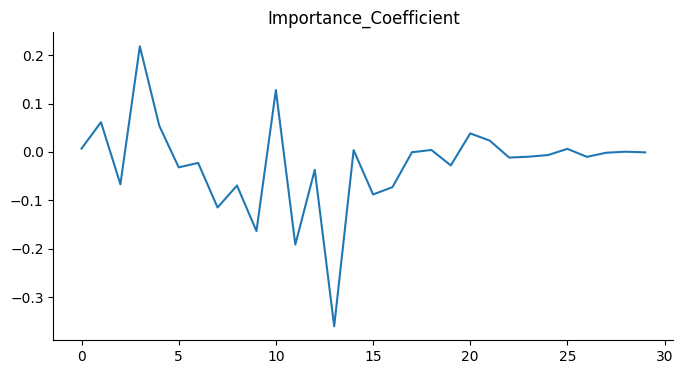

In [ ]:
#Importance_Coefficient

from matplotlib import pyplot as plt
coefficients['Importance_Coefficient'].plot(kind='line', figsize=(8, 4), title='Importance_Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

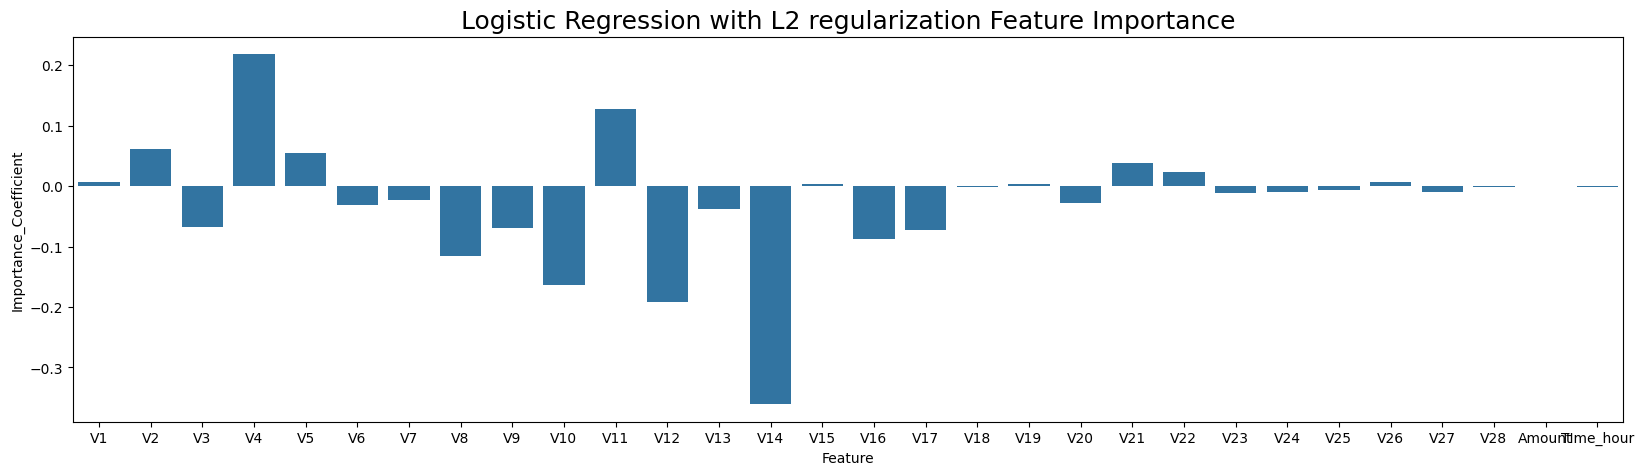

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
sns.barplot(x='Feature', y='Importance_Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 regularization Feature Importance", fontsize=18)
plt.show()

Hence it implies that V4, V5, V1 have +'ve importance whereas V10, V12, V14 seem to have -'ve impact on our predictions

## Model building with balancing Classes

Perform class balancing with:

- Random Sampling
- SMOTE
- ADASYN

## Oversampling with RandomOverSampler with StrafiedKFold Cross Validation

      - We will use Random Oversampling method to handle the class imbalance

In [ ]:
#Creating the dataset with RandomOverSampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits = 5, random_state = None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
  X_train = X.loc[train_index]
  y_train = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test = y.loc[test_index]
  ROS = RandomOverSampler(sampling_strategy =0.5)
  X_over, y_over = ROS.fit_resample(X_train, y_train)

X_over = pd.DataFrame(data = X_over, columns = cols)


KNN Model
model score
0.9980688541282632
Confusion Matrix 


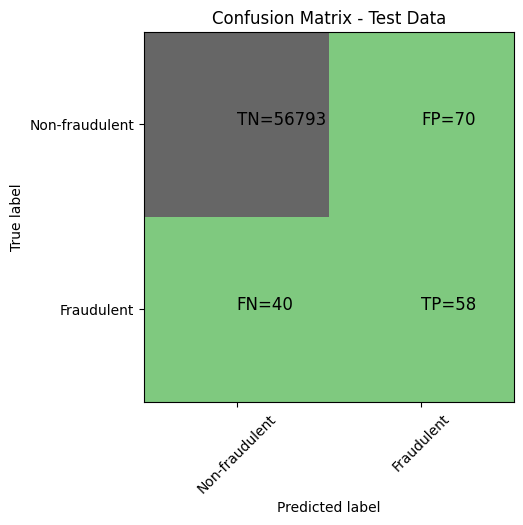

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


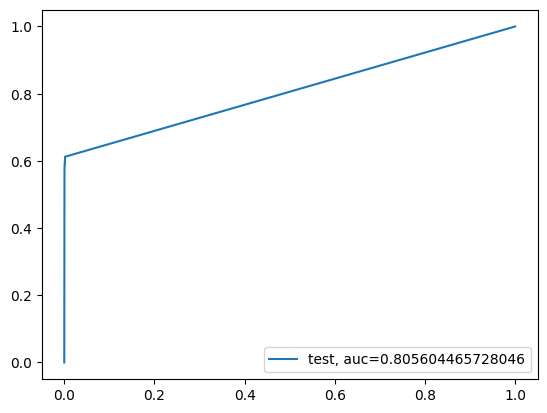

Time taken by the model: --- 357.71245431900024 seconds ---
------------------------------------------------------------


In [ ]:
#Running for KNN Model
Data_imbalance_Handling = "random OverSampling with StratifiedKFOld CV"
print("KNN Model")
start_time = time.time()
df_Results = BuildAndRunKNNModels(df_Results, Data_imbalance_Handling, X_over, y_over,X_test, y_test)
print("Time taken by the model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)

Decision Tree Model
giniscore: 0.9990344270641316
Confusion Matrix


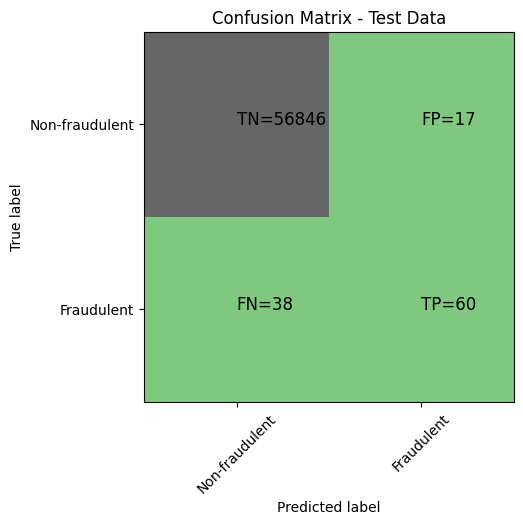

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.61      0.69        98

    accuracy                           1.00     56961
   macro avg       0.89      0.81      0.84     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8059729668910633
Tree threshold: 1.0
ROC for the test dataset 80.6%


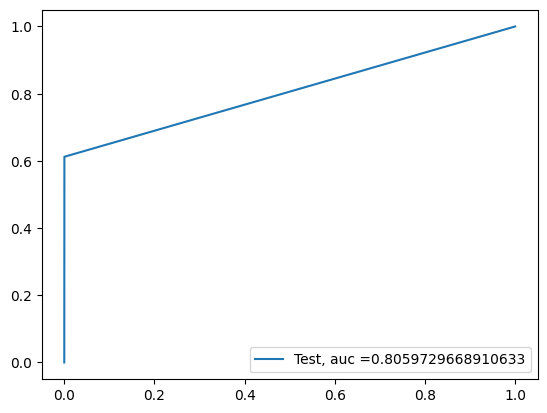

entropyscore: 0.9991573181650603
Confusion Matrix


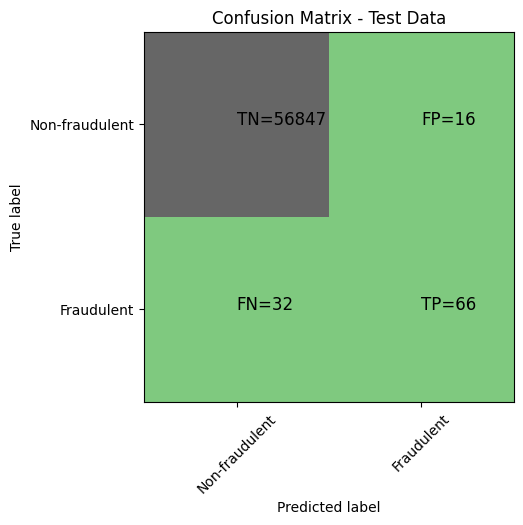

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.80      0.67      0.73        98

    accuracy                           1.00     56961
   macro avg       0.90      0.84      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8365940048530536
Tree threshold: 1.0
ROC for the test dataset 83.7%


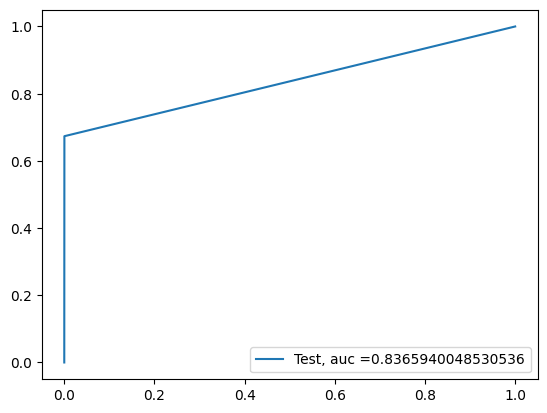

Time taken by the model: --- 31.190850019454956 seconds ---
------------------------------------------------------------


In [ ]:
Data_imbalance_Handling = "random OverSampling with StratifiedKFOld CV"
print("Decision Tree Model")
start_time = time.time()
df_Results = BuildAndRunTreeModels(df_Results, Data_imbalance_Handling, X_over, y_over,X_test, y_test)
print("Time taken by the model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)

Random Forest Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


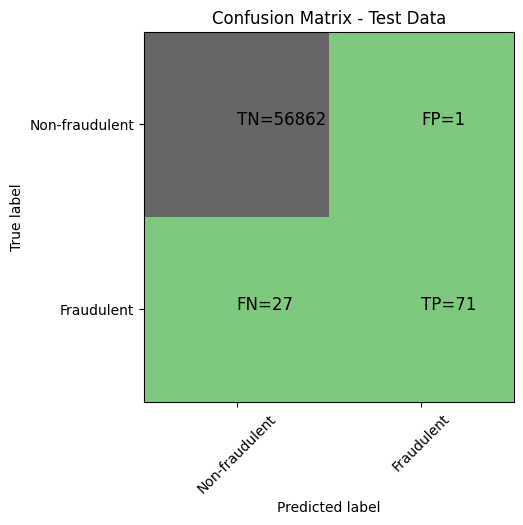

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random FOrest roc_value : <function roc_curve at 0x782a1917fc70>
Random Forest threshold: 0.02
ROC for the test dataset 94.6%


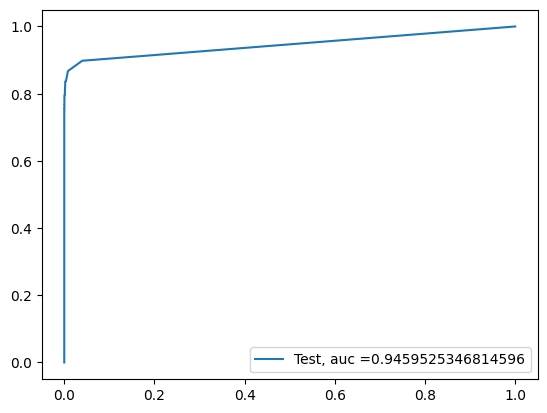

Time taken by the model: --- 230.1794319152832 seconds ---
------------------------------------------------------------


In [ ]:
Data_imbalance_Handling = "random OverSampling with StratifiedKFOld CV"
print("Random Forest Model")
start_time = time.time()
df_Results = BuildAndRunRandomFOrestModels(df_Results, Data_imbalance_Handling, X_over, y_over,X_test, y_test)
print("Time taken by the model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)

XGBoost Model
Model accuracy: 0.9994733238531627
Confusion Matrix


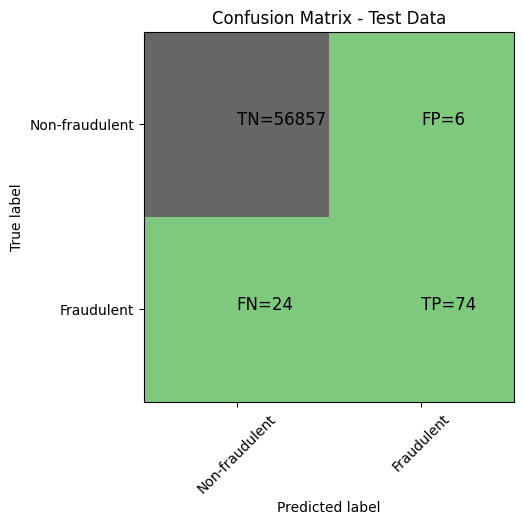

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.76      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.978794000761587
XGBoost threshold: 9.028779459185898e-05
ROC for the test dataset 97.9%


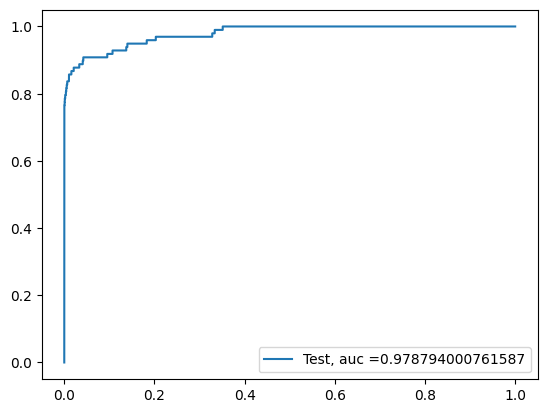

Time taken by the model: --- 7.669921875 seconds ---
------------------------------------------------------------


In [ ]:
Data_imbalance_Handling = "random OverSampling with StratifiedKFOld CV"
print("XGBoost Model")
start_time = time.time()
df_Results = BuildAndRunXGBoostModels(df_Results, Data_imbalance_Handling, X_over, y_over,X_test, y_test)
print("Time taken by the model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)

In [ ]:
#Creating the dataset with SMOTE and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits = 5, random_state = None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
  X_train = X.loc[train_index]
  y_train = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test = y.loc[test_index]
  SMOTE = over_sampling.SMOTE(random_state = 0)
  X_train_Smote, y_train_Smote = SMOTE.fit_resample(X_train, y_train)

X_train_Smote = pd.DataFrame(data = X_train_Smote, columns = cols)

XGBoost Model
Model accuracy: 0.9994031003669177
Confusion Matrix


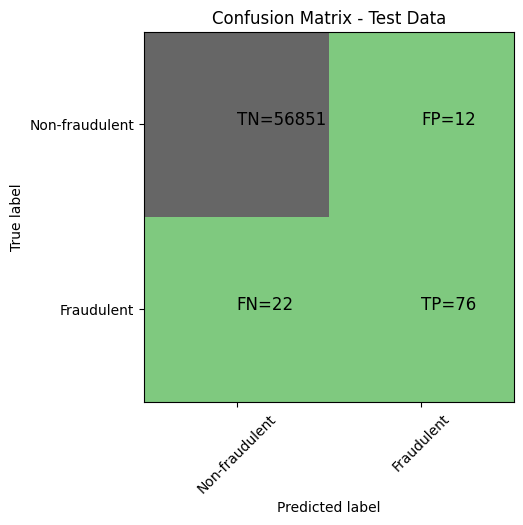

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9704734293344512
XGBoost threshold: 0.000144163059303537
ROC for the test dataset 97.0%


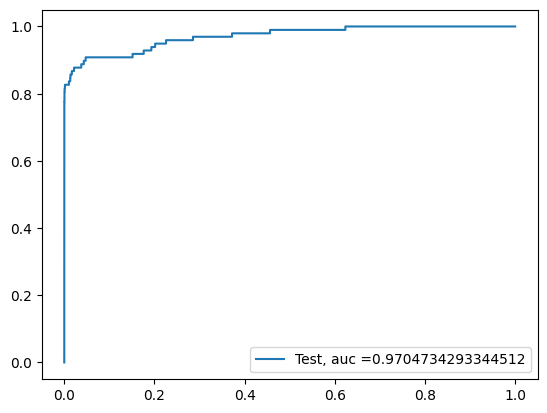

Time taken by the model: --- 12.057912111282349 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_imbalance_Handling = "SMOTE Oversmapling with StratifiedKFold"
print("XGBoost Model")
start_time = time.time()
df_Results = BuildAndRunXGBoostModels(df_Results, Data_imbalance_Handling, X_train_Smote, y_train_Smote,X_test, y_test)
print("Time taken by the model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80)

KNN Model
model score
0.9946805709169432
Confusion Matrix 


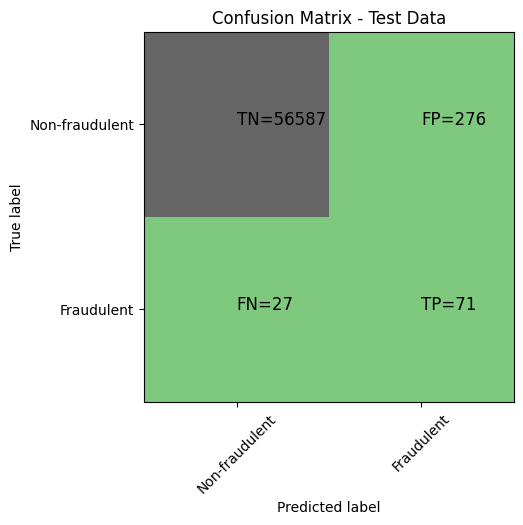

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset 86.0%


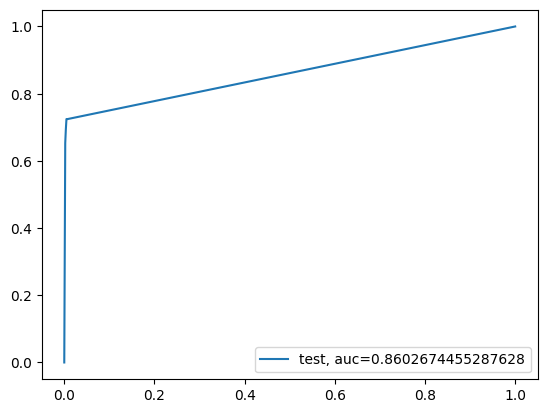

Time taken by the model: --- 489.200909614563 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_imbalance_Handling = "SMOTE Oversmapling with StratifiedKFold"
print("KNN Model")
start_time = time.time()
df_Results = BuildAndRunKNNModels(df_Results, Data_imbalance_Handling, X_train_Smote, y_train_Smote,X_test, y_test)
print("Time taken by the model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80)

Decision Tree Model
giniscore: 0.9977528484401608
Confusion Matrix


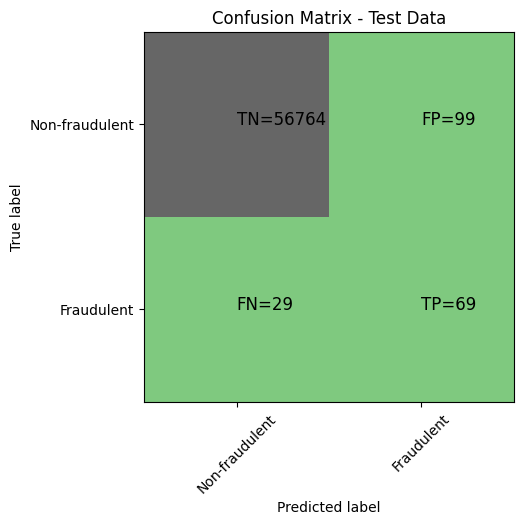

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8511703029874526
Tree threshold: 1.0
ROC for the test dataset 85.1%


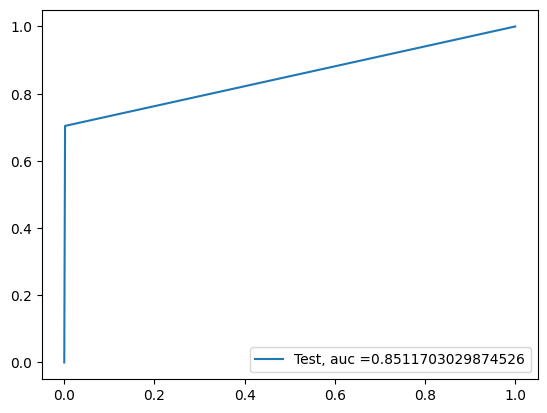

entropyscore: 0.9969803900914661
Confusion Matrix


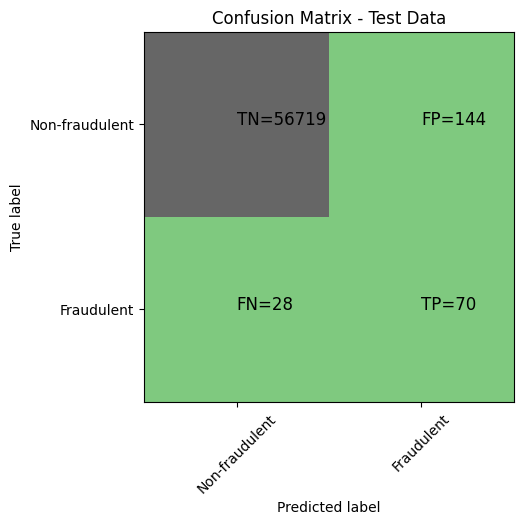

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8558766559223799
Tree threshold: 1.0
ROC for the test dataset 85.6%


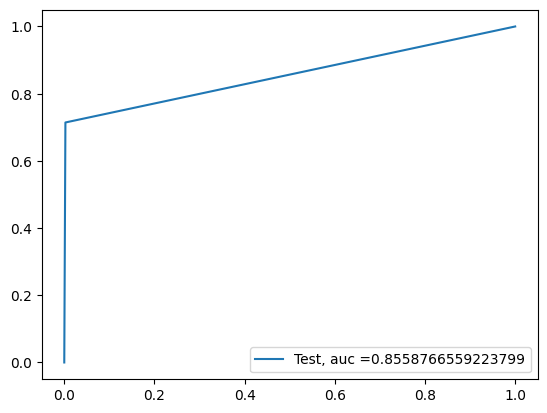

Time taken by the model: --- 98.77537250518799 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_imbalance_Handling = "SMOTE Oversmapling with StratifiedKFold"
print("Decision Tree Model")
start_time = time.time()
df_Results = BuildAndRunTreeModels(df_Results, Data_imbalance_Handling, X_train_Smote, y_train_Smote,X_test, y_test)
print("Time taken by the model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80)

Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


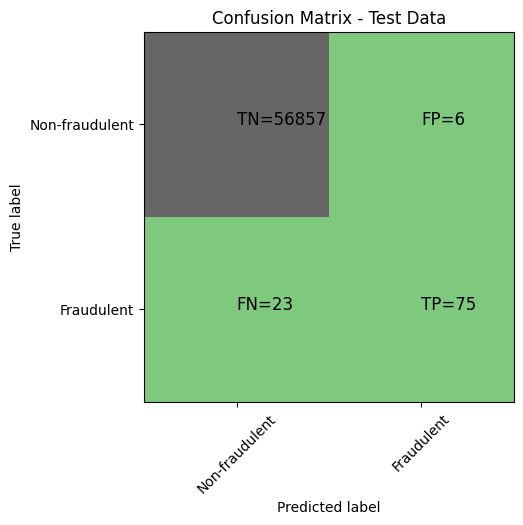

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random FOrest roc_value : <function roc_curve at 0x782a1917fc70>
Random Forest threshold: 0.05
ROC for the test dataset 96.1%


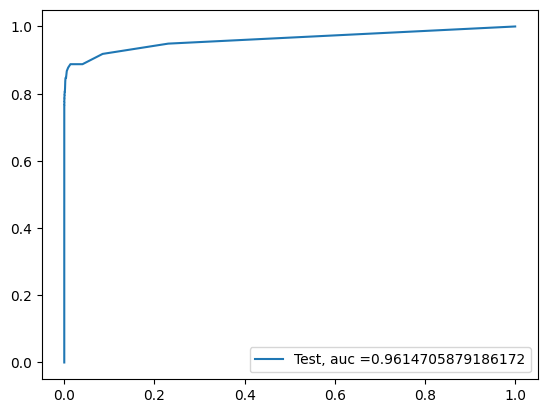

Time taken by the model: --- 521.3199372291565 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_imbalance_Handling = "SMOTE Oversmapling with StratifiedKFold"
print("Random Forest Model")
start_time = time.time()
df_Results = BuildAndRunRandomFOrestModels(df_Results, Data_imbalance_Handling, X_train_Smote, y_train_Smote,X_test, y_test)
print("Time taken by the model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80)

## Oversmapling with ADASYN and StratifiedKFold
 - We will ADASYN Oversampling method to handle the class imbalance

In [ ]:
#Creating the dataset with ADASYN and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits = 5, random_state = None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
  X_train = X.loc[train_index]
  y_train = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test = y.loc[test_index]
  ADASYN = over_sampling.ADASYN(random_state = 0)
  X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train)

X_train_ADASYN = pd.DataFrame(data = X_train_ADASYN, columns = cols)

Random Forest Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


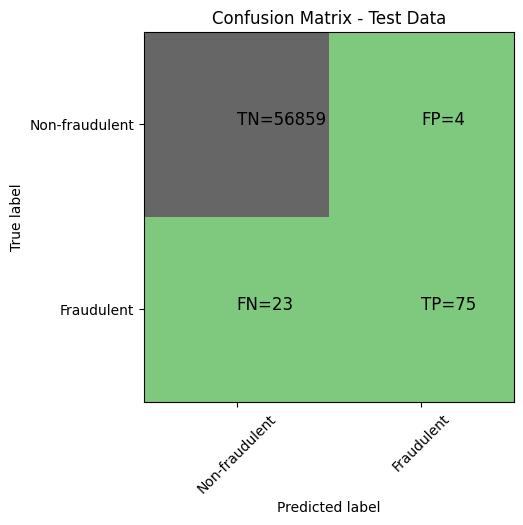

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random FOrest roc_value : <function roc_curve at 0x782a1917fc70>
Random Forest threshold: 0.03
ROC for the test dataset 96.3%


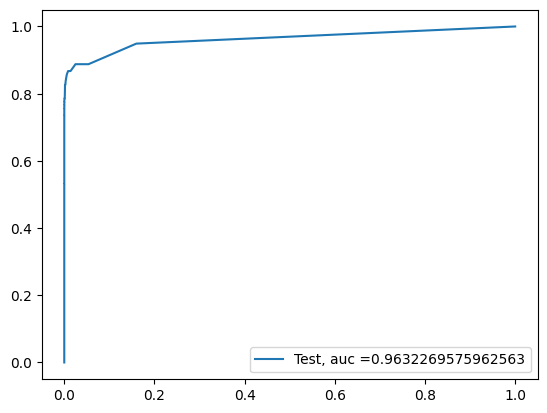

Time taken by the model: --- 518.0194351673126 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_imbalance_Handling = "SMOTE Oversmapling with StratifiedKFold"
print("Random Forest Model")
start_time = time.time()
df_Results = BuildAndRunRandomFOrestModels(df_Results, Data_imbalance_Handling, X_train_ADASYN, y_train_ADASYN,X_test, y_test)
print("Time taken by the model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80)

Decision Tree Model
giniscore: 0.9979459630273345
Confusion Matrix


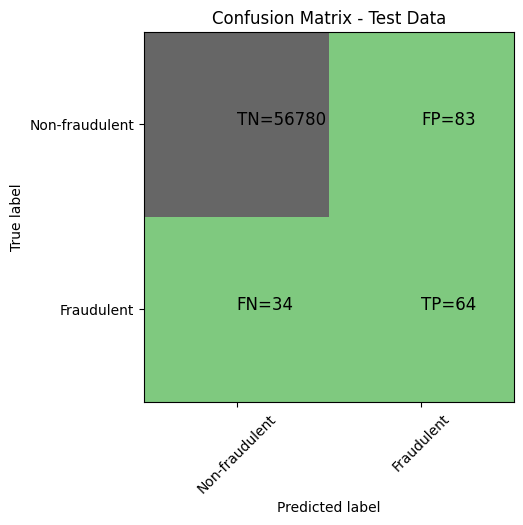

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8258007879303172
Tree threshold: 1.0
ROC for the test dataset 82.6%


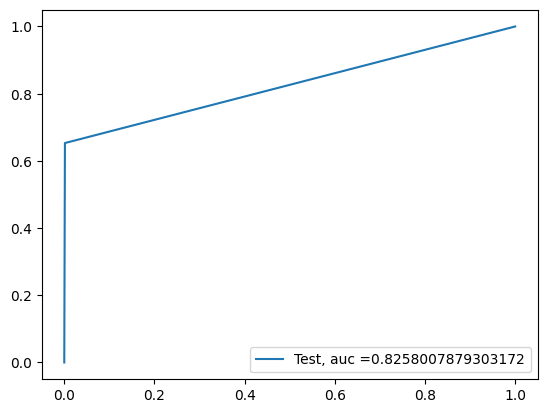

entropyscore: 0.9954179175225154
Confusion Matrix


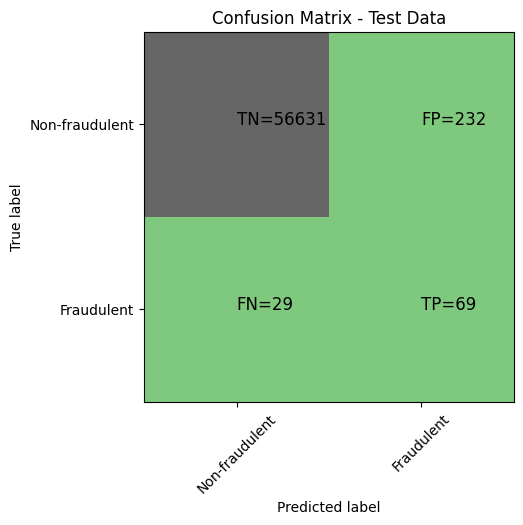

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.70      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8500008254713172
Tree threshold: 1.0
ROC for the test dataset 85.0%


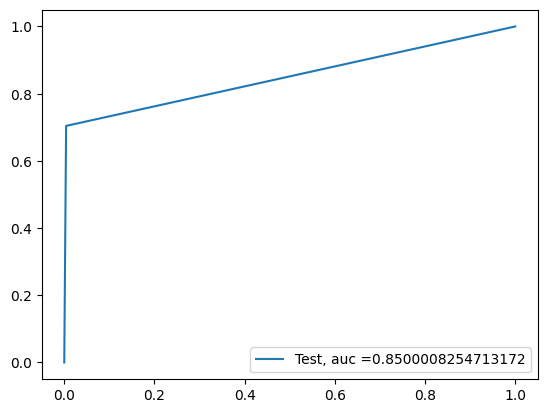

Time taken by the model: --- 91.7505362033844 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_imbalance_Handling = "SMOTE Oversmapling with StratifiedKFold"
print("Decision Tree Model")
start_time = time.time()
df_Results = BuildAndRunTreeModels(df_Results, Data_imbalance_Handling, X_train_ADASYN, y_train_ADASYN,X_test, y_test)
print("Time taken by the model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80)

KNN Model
model score
0.9945050122013307
Confusion Matrix 


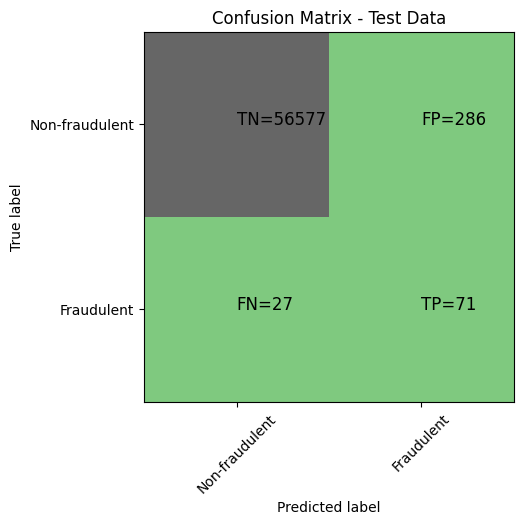

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc value: 0.8601937811862167
KNN threshold: 0.6
ROC for the test dataset 86.0%


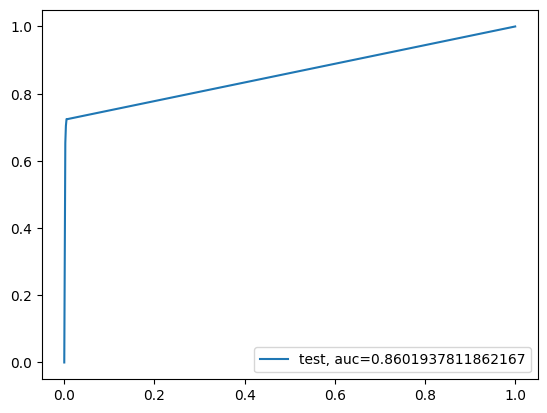

Time taken by the model: --- 459.5129613876343 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_imbalance_Handling = "SMOTE Oversmapling with StratifiedKFold"
print("KNN Model")
start_time = time.time()
df_Results = BuildAndRunKNNModels(df_Results, Data_imbalance_Handling, X_train_ADASYN, y_train_ADASYN,X_test, y_test)
print("Time taken by the model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80)

XGBoost Model
Model accuracy: 0.999350432752234
Confusion Matrix


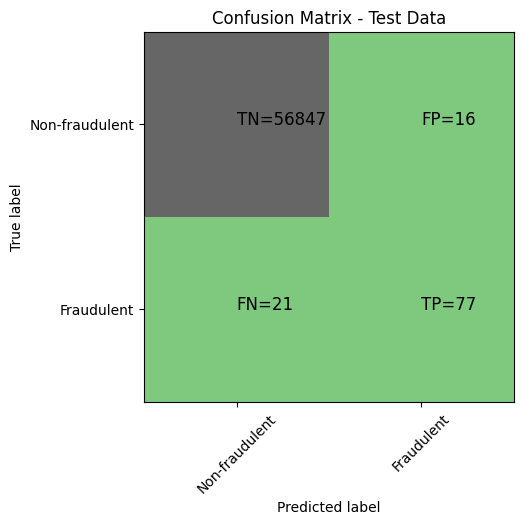

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.79      0.81        98

    accuracy                           1.00     56961
   macro avg       0.91      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9696561230052754
XGBoost threshold: 0.00012316476204432547
ROC for the test dataset 97.0%


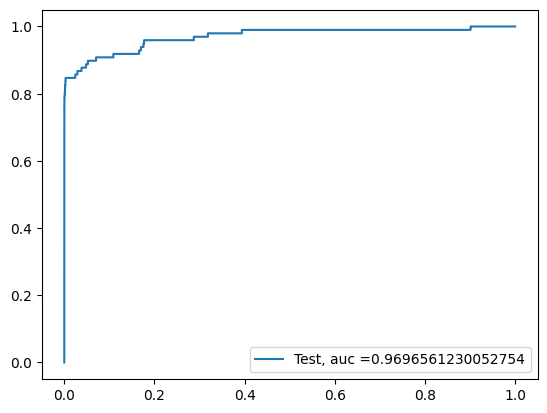

Time taken by the model: --- 11.4100022315979 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_imbalance_Handling = "SMOTE Oversmapling with StratifiedKFold"
print("XGBoost Model")
start_time = time.time()
df_Results = BuildAndRunXGBoostModels(df_Results, Data_imbalance_Handling, X_train_ADASYN, y_train_ADASYN,X_test, y_test)
print("Time taken by the model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80)

#RESULTS for ADASYN Oversampling with StratifiedKFold:
looking at the accuracy and ROC value we have XGBoost which has provided best results ofr ADASYN OverSampling with StratifiedKFold techquique

## Overall conclusion after running the models on Oversampled data:
Looking at above results it seems XGBOOST model with random OverSampling with StratifiedKFold CV has provided the best results under the category of all oversampling techniques. SO we will try to tune the hyperparameters of the model to get results.

## Hypterparameter Tuning

## HPT - Xgboost Classifier

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_test = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'n_estimators': range(60, 130, 10),  # Corrected parameter range
    'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.2],  # Adjusted values
    'gamma': [i / 10.0 for i in range(0, 5)],
    'subsample': [i / 10.0 for i in range(7, 10)],
    'colsample_bytree': [i / 10.0 for i in range(7, 10)]
}

gsearch1 = RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                                      colsample_bynode=1, max_delta_step=0,
                                                      missing=None, n_jobs=-1,
                                                      nthread=None, objective='binary:logistic', random_state=42,
                                                      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                                                      silent=None, verbosity=1),
                              param_distributions=param_test, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5)

gsearch1.fit(X_over, y_over)

print("CV Results:", gsearch1.cv_results_)
print("Best Parameters:", gsearch1.best_params_)
print("Best Score:", gsearch1.best_score_)


CV Results: {'mean_fit_time': array([11.94247122, 12.75971341, 13.55828662,  9.70578642, 10.37329865]), 'std_fit_time': array([0.31854982, 0.34186422, 1.16155553, 0.75195043, 1.377363  ]), 'mean_score_time': array([0.02243299, 0.01769991, 0.0276279 , 0.02496109, 0.01727076]), 'std_score_time': array([0.00774541, 0.00141513, 0.00796136, 0.00812903, 0.00317572]), 'param_subsample': masked_array(data=[0.9, 0.8, 0.7, 0.8, 0.7],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[110, 100, 110, 80, 90],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 3, 3, 3, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[5, 9, 7, 5, 7],
             mask=[False, False, False, False, False],
       fill_value='?',

## Conclusion
In the oversample cases, it's evident that from all the modeles that were built XGBoost performed the best in terms of accuracy, roc_auc, the time complexity and the classification report as well. SO from the above model building we can conclude that XGBoost performed the best amongst the rest